# Kaggle - Titanic 캐글 타이타닉 생존자 예측
- https://www.youtube.com/watch?v=aqp_9HV58Ls (허민석님 유투브 영상 + 개인 추가)
### Predict survival on the Titanic 
- 문제정의 (Defining the problem statement )
- 데이터 로드(Collecting the data)
- 탐색적 분석(Exploratory data analysis)
- 전처리(Feature engineering)
- 모델링(Modelling)
- 테스트(Testing)

### Data 설명 (Data Dictionary)

- PassengerId: 탑승자 id
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd # pcalss = 좌석등급  	
- sibsp:	# of siblings / spouses aboard the Titanic # 형제 및 배우자 같이 탑승여부 및 수
- parch:	# of parents / children aboard the Titanic # 부모 및 자식 같이 탑승여부 및 수
- ticket:	Ticket number	# 
- Passenger Fare : 여객운임
- sex, age : 성별, 나이
- cabin:	Cabin number	# 객실번호
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton # 어느선착장에서 탔는지 

- **Survived: 	0 = No, 1 = Yes # 생존여부 종속변수**

## 1. 문제정의 (Defining the problem statement)
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.
### ==> 타이타닉 생존자 예측 

In [534]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg",width=300, height=100)

## 2. 데이터 로딩, 수집 (Collecting the data)
- training data set and testing data set are given by Kaggle
- [data link](https://www.kaggle.com/c/titanic/data)  

In [535]:
# 1. 데이터 로드
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print('데이터 로딩 완료')

데이터 로딩 완료


## 3. 탐색적 데이터 분석 (Exploratory data analysis)

In [536]:
# 탐색적분석 - (1) 데이터 확인
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [537]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [538]:
# 탐색적분석 - (2) null 값들 파악
# RangeIndex : 전체 행이 891행 / age와 Cabin은 714, 204로 결측치가 많음!
# 추가로 Embarked 2개, 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [539]:
# 탐색적분석 - (2) null 값들 파악 - test 
# RangeIndex : 전체 행이 418행 / age와 Cabin은 332, 91로 결측치가 많음!
# 추가로 Fare 1개
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [540]:
# 탐색적분석 - (2) null 값들 파악 
print(train.isnull().sum(),'\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Bar Chart for Categorical Features 범주형변수들과 - 목적변수와의 관계
#### Survived - 다른 Feature 비교
- Pclass - 티켓등급
- Sex - 성별
- SibSp ( # of siblings and spouse) - 형제, 배우자
- Parch ( # of parents and children) - 부모님, 자식
- Embarked - 선착장별
- Cabin - 선실등급

In [541]:
# 탐색적분석 - (3) 시각화 - 범주형변수들과 - 목적변수와의 관계를 봄
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# 범주형변수와 목적변수와의 관계 그래프 보여줌.
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() # 
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    

In [542]:
### 생존자 수 변수
suv = len(train[train['Survived']==1])
dead = len(train[train['Survived']==0])
print('생존자수:', suv, ' 사망자수:', dead)

생존자수: 342  사망자수: 549



생존남성수: 109 생존여성수: 233
죽은남성수: 468 죽은여성수: 81

전체 남성 중  18.9 % 이 살음
전체 여성 중  74.2 % 이 살음

생존자 중 남성은  31.9 %
생존자 중 여성은  68.1 %
사망자 중 남성은  85.2 %
사망자 중 여성은  14.8 %


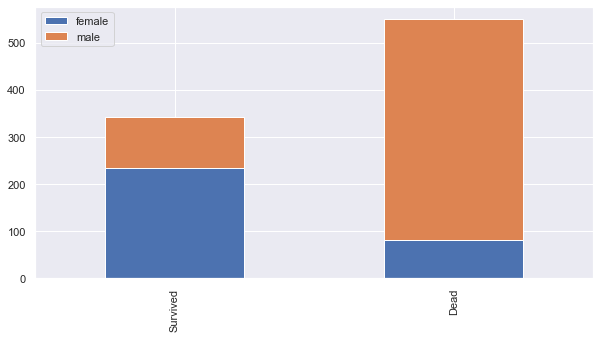

In [543]:
import numpy as np

# 생존, 비생존
Survived_sex = train[train['Survived']==1]['Sex']
Dead_sex = train[train['Survived']==0]['Sex']#.value_counts()

# 생존남성, 생존여성
Survived_sex_male = len(Survived_sex[Survived_sex.values=='male'])
Survived_sex_female = len(Survived_sex[Survived_sex.values=='female'])

# 사망남성, 사망여성
Dead_sex_male = len(Dead_sex[Dead_sex.values=='male'])
Dead_sex_female = len(Dead_sex[Dead_sex.values=='female'])

print()
print('생존남성수:', Survived_sex_male, '생존여성수:',Survived_sex_female)
print('죽은남성수:', Dead_sex_male, '죽은여성수:', Dead_sex_female)

# 전체 남성 중 생존한 남성비율 / 전체 여성 중 생존한 여성 비율
male_suv_rate = Survived_sex_male/(Survived_sex_male + Dead_sex_male)
female_suv_rate = Survived_sex_female/(Survived_sex_female + Dead_sex_female)

print()
print('전체 남성 중 ', np.round(male_suv_rate*100,1),'% 이 살음')
print('전체 여성 중 ', np.round(female_suv_rate*100,1), '% 이 살음')

# 생존자 중 남성, 여성 비율 / 사망자 중 남성, 여성 비율
suv_male_rate = Survived_sex_male/suv
suv_female_rate = Survived_sex_female/suv
dead_male_rate = Dead_sex_male/dead
dead_female_rate = Dead_sex_female/dead

print()
print('생존자 중 남성은 ', np.round(suv_male_rate*100,1),'%')
print('생존자 중 여성은 ', np.round(suv_female_rate*100,1), '%')
print('사망자 중 남성은 ', np.round(dead_male_rate*100,1),'%')
print('사망자 중 여성은 ', np.round(dead_female_rate*100,1), '%')

bar_chart('Sex') 

- 남성보단 여성이 많이 생존 (31% vs 68%)
- 죽은사람의 대부분(85%)은 남성

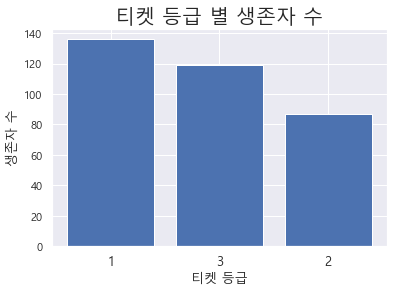

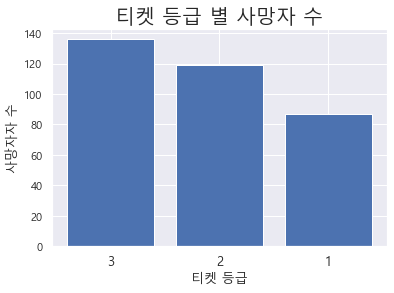

In [544]:
# 티켓 등급과의 관련
# 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#
suv_Pclass = train[train['Survived']==1]['Pclass'].value_counts()
dead_Pclass = train[train['Survived']==0]['Pclass'].value_counts()

# label x축
label1, label2 = suv_Pclass.index, dead_Pclass.index
index1, index2 = np.arange(len(label1)), np.arange(len(label2))

## 티켓 등급별 생존자 수 시각화
plt.bar(index1, suv_Pclass)
plt.title('티켓 등급 별 생존자 수', fontsize=20)
plt.xlabel('티켓 등급', fontsize=13)
plt.ylabel('생존자 수', fontsize=13)
plt.xticks(index1, label1, fontsize=13)
plt.show()

## 티켓 등급별 사망자 수 시각화
plt.bar(index2, suv_Pclass)
plt.title('티켓 등급 별 사망자 수', fontsize=20)
plt.xlabel('티켓 등급', fontsize=13)
plt.ylabel('사망자자 수', fontsize=13)
plt.xticks(index2, label2, fontsize=13)
plt.show()

#bar_chart('Pclass')

- 생존 자 중 티켓등급이 높은 사람이 많이 살아남음
- 사망 자 중 티켓등급이 낮은 사람이 더 많이 죽음

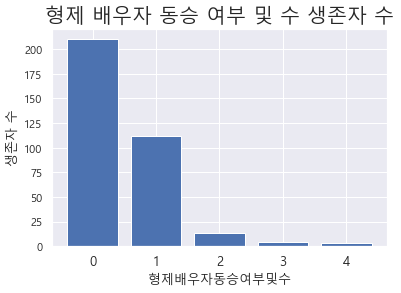

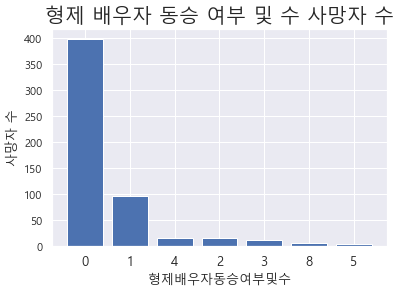

In [545]:
# 형제 나 배우자 여부 및 수에 따른 생존자, 사망자 수 시각화
suv_Sibsp = train[train['Survived']==1]['SibSp'].value_counts()
dead_Sibsp = train[train['Survived']==0]['SibSp'].value_counts()

# label x축
label1, label2 = suv_Sibsp.index, dead_Sibsp.index
index1, index2 = np.arange(len(label1)), np.arange(len(label2))

## 형제, 배우자 및 수 별 사망자 수 시각화
plt.bar(index1, suv_Sibsp)
plt.title('형제 배우자 동승 여부 및 수 생존자 수', fontsize=20)
plt.xlabel('형제배우자동승여부및수', fontsize=13)
plt.ylabel('생존자 수', fontsize=13)
plt.xticks(index1, label1, fontsize=13)
plt.show()

## 형제 동승 및 수 별 사망자 수 시각화
plt.bar(index2, dead_Sibsp)
plt.title('형제 배우자 동승 여부 및 수 사망자 수', fontsize=20)
plt.xlabel('형제배우자동승여부및수', fontsize=13)
plt.ylabel('사망자 수', fontsize=13)
plt.xticks(index2, label2, fontsize=13)
plt.show()

#bar_chart('SibSp')

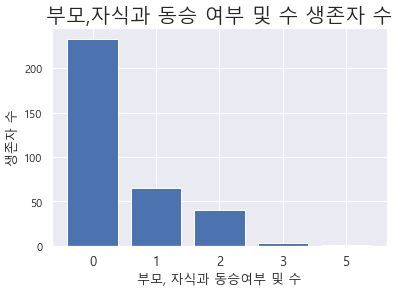

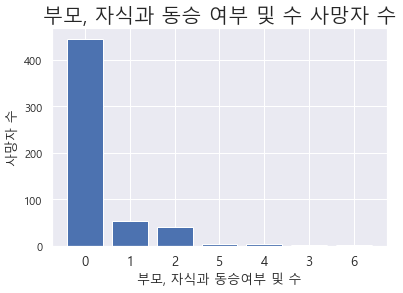

In [546]:
# 부모 또는 자식과 동승 여부 및 수에 따른 생존자, 사망자 수 시각화
suv_Parch = train[train['Survived']==1]['Parch'].value_counts()
dead_Parch = train[train['Survived']==0]['Parch'].value_counts()

# label x축
label1, label2 = suv_Parch.index, dead_Parch.index
index1, index2 = np.arange(len(label1)), np.arange(len(label2))

## 부모,자식과 동승여부 및 수 별 사망자 수 시각화
plt.bar(index1, suv_Parch)
plt.title('부모,자식과 동승 여부 및 수 생존자 수', fontsize=20)
plt.xlabel('부모, 자식과 동승여부 및 수', fontsize=13)
plt.ylabel('생존자 수', fontsize=13)
plt.xticks(index1, label1, fontsize=13)
plt.show()

## 부모,자식과 동승여부 및 수 별 사망자 수 시각화
plt.bar(index2, dead_Parch)
plt.title('부모, 자식과 동승 여부 및 수 사망자 수', fontsize=20)
plt.xlabel('부모, 자식과 동승여부 및 수', fontsize=13)
plt.ylabel('사망자 수', fontsize=13)
plt.xticks(index2, label2, fontsize=13)
plt.show()


- 생존자 중 대부분은 홀로 탑승한 사람이 많았고, 생존, 사망 둘다 많은 비중을 차지 => 'https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89' 위키피디아- 첫 항해에 오른 승객은 다양했으며 이 가운데에는 매우 부유한 사람들도 있었다. 대다수는 영국과 스칸다나비아 반도 등에서 새로운 삶을 찾아 미국으로 가는 이민자들이었다'
- 타이타닉 배 자체가 이민자들이 많이 탐.

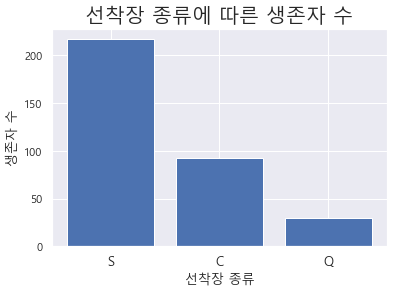

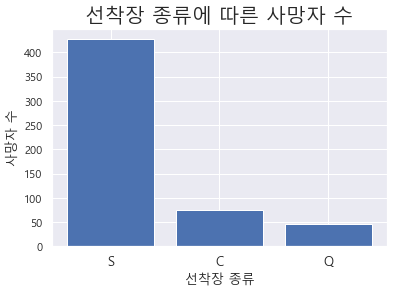

In [547]:
# 선착장 종류에 따른 생존자, 사망자 수 시각화
suv_Embarked = train[train['Survived']==1]['Embarked'].value_counts()
dead_Embarked = train[train['Survived']==0]['Embarked'].value_counts()

# label x축
label1, label2 = suv_Embarked.index, dead_Embarked.index
index1, index2 = np.arange(len(label1)), np.arange(len(label2))

## 선착장 종류에 따른 사망자 수 시각화
plt.bar(index1, suv_Embarked)
plt.title('선착장 종류에 따른 생존자 수', fontsize=20)
plt.xlabel('선착장 종류', fontsize=13)
plt.ylabel('생존자 수', fontsize=13)
plt.xticks(index1, label1, fontsize=13)
plt.show()

## 선착장 종류에 따른 사망자 수 시각화
plt.bar(index2, dead_Embarked)
plt.title('선착장 종류에 따른 사망자 수', fontsize=20)
plt.xlabel('선착장 종류', fontsize=13)
plt.ylabel('사망자 수', fontsize=13)
plt.xticks(index2, label2, fontsize=13)
plt.show()


- S선착장에서 많이 탔음. 많이 살고, 많이 죽고
- 혹시 Embarked의 missing값이 있다면 S라고 임의 분류가능?

## 4. 전처리 Feature engineering

### 4.1 Name
- Name 이름 자체는 필요없고, 
- 호칭 결혼 한 사람, 결혼 안한사람, 자식있는 사람 등 Mrs, Mr 등 호칭이 다를 것이므로 유효한 정보가 될 수 있음.

In [548]:
train['Name'][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [549]:
# Title 이란 변수 생성 / 이름 성
# train 한번, test 한 번
train_test_data = [train, test] # combining train and test dataset

# train과, test의 Title변수에 
for dataset in train_test_data:
    # [A-Za-z] 알파벳 모두가 + 반복되는 \. 까지 . 하나만 찍으면 인식안됨
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True)
print(train['Title'].value_counts(), '\n\n', test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Countess      1
Mme           1
Ms            1
Don           1
Jonkheer      1
Sir           1
Lady          1
Name: Title, dtype: int64 

 Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


#### Title map
- Mr : 0 - 남성
- Miss : 1  - 미혼여성
- Mrs: 2  - 기혼여성
- Others: 3

In [550]:
# Title mapping
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

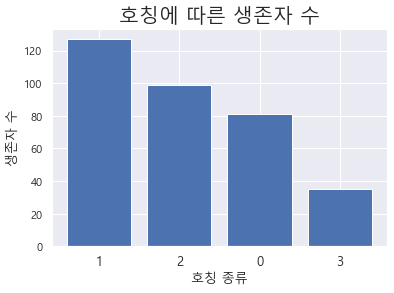

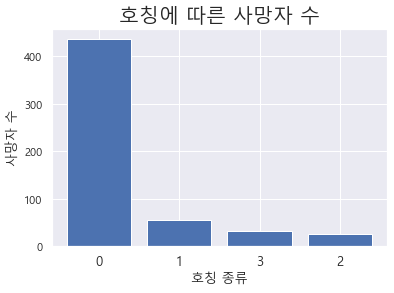

In [551]:
# 호칭 에 따른 생존자, 사망자 수 시각화
suv_Title = train[train['Survived']==1]['Title'].value_counts()
dead_Title = train[train['Survived']==0]['Title'].value_counts()

# label x축
label1, label2 = suv_Title.index, dead_Title.index
index1, index2 = np.arange(len(label1)), np.arange(len(label2))

## 호칭에 따른 사망자 수 시각화
plt.bar(index1, suv_Title)
plt.title('호칭에 따른 생존자 수', fontsize=20)
plt.xlabel('호칭 종류', fontsize=13)
plt.ylabel('생존자 수', fontsize=13)
plt.xticks(index1, label1, fontsize=13)
plt.show()

## 선착장 종류에 따른 사망자 수 시각화
plt.bar(index2, dead_Title)
plt.title('호칭에 따른 사망자 수', fontsize=20)
plt.xlabel('호칭 종류', fontsize=13)
plt.ylabel('사망자 수', fontsize=13)
plt.xticks(index2, label2, fontsize=13)
plt.show()

## => 0 : MS 남성이 많이 사망

In [552]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

### 4.2 Sex
- male: 0
- female: 1
- 숫자로만 변환시켜줌

In [553]:
# 성별 항목 숫자로 변환
print('변환 전 dtypes:', train['Sex'].dtypes)
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
print('변환 후 dtypes:', dataset['Sex'].dtypes)

변환 전 dtypes: object
변환 후 dtypes: int64


### 4.3 Age

#### 4.3.1 나이의 대부분 데이터가 missing -> missing 값 처리 
- 전체 데이터에 대한 나이 평균도 적용 가능
- title 별 각각 median 적용 -> Ms 일경우 Ms 끼리의 평균 / Mrs 일 경우 Mrs 끼리의 평균
- (머신러닝 적용도 가능 kaggle - bike-sharing)

In [554]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [555]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [556]:
# Age 항목의 Missing 값 채우기
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
# train이 na일경우 fill 해라 title로 groupby 해서 age항목의 median 값으로 
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

# -> median or mean 둘중 하나 사용이 일반적 case by case 라고 함.
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

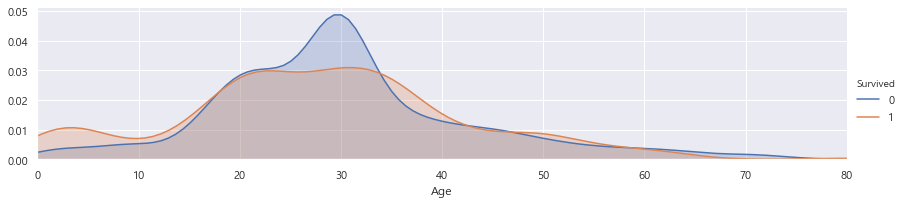

In [557]:
# Age 항목을 시각화 해본 것 (전체 나이)
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0, 20)

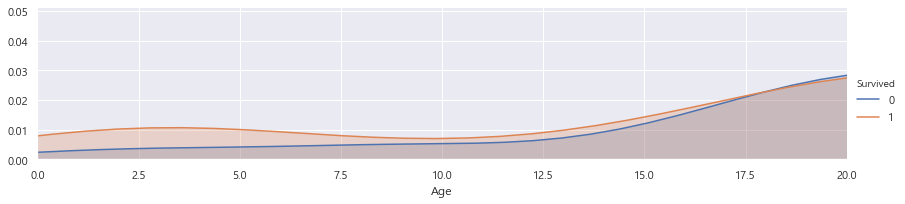

In [558]:
# Age 항목을 시각화 해본 것 (0~20)
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 40)

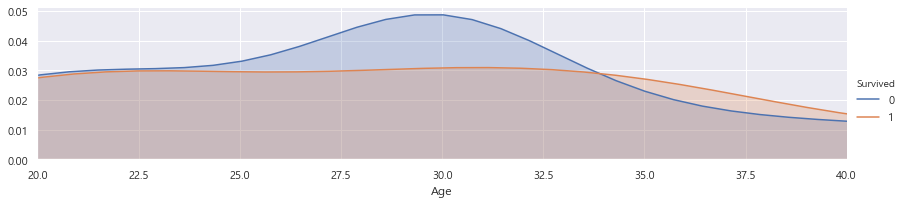

In [559]:
# Age 항목을 시각화 해본 것 (20~40)
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)

(40, 60)

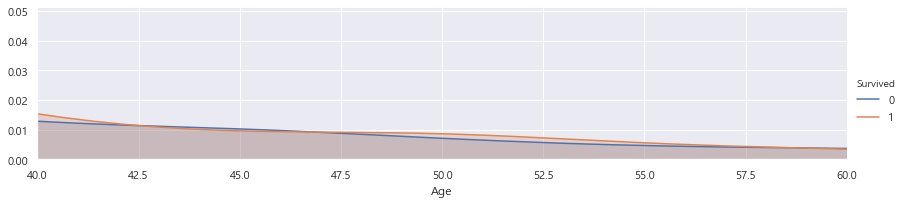

In [560]:
# Age 항목을 시각화 해본 것 (40~60)

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60, 80.0)

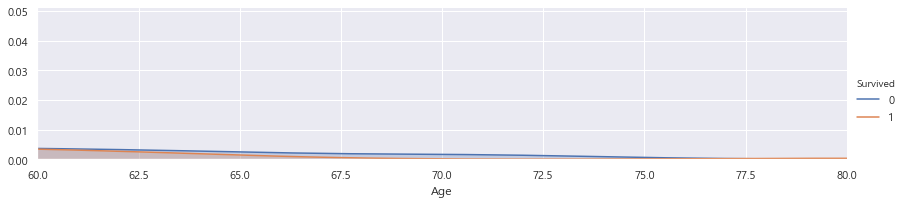

In [561]:
# Age 항목을 시각화 해본 것 (60~)
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

#### 4.3.2 나이 범주화 변수 생성(Binning)- Age (변수 구간화 기법)
- 나이에 대해서 0~80까지 다 넣으면 너무 많은 정보가 많음.
- Sequential 한 정보가 있고, 많은 정보를 주지 못할때는 큰 카테고리로 묶는 것 (Binning 기법 - 변수 가공 기법 중 하나)
- 데이콘 버스 퇴근시간 예측 할때도 시간 24시간을 2시간~3시간 단위로 묶어서 보는 것과 같은 원리
- Binning/Converting Numerical Age to Categorical Variable  
- https://medium.com/heartcount/heartcount-%EC%82%AC%EC%9A%A9-tip-binning-%EA%B8%B0%EB%8A%A5%EC%97%90-%EB%8C%80%ED%95%98%EC%97%AC-513a0b9e5a3b // 참고 블로그


feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [562]:
# 여기가 중요 
# Binning ok -> 근데 왜 16, 26, 36, 62 로 기준을 나눈 근거
# => 변곡점 기준? describe 25 50 75 값들?
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0, # 16~26
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [563]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


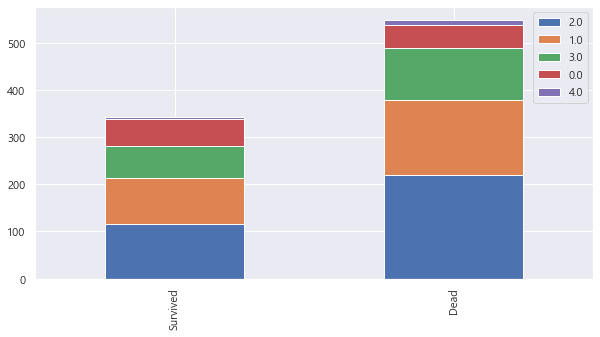

In [564]:
bar_chart('Age')

- 0(0-16), 1(16-26), 2(26-36), 3(36-62), 4(62- )
- 청소년-젊은사람(16-62)들이 산사람보다 죽은사람이 많음 
- 나이드신분은 사신분보다 돌아가신분이 많음

### 4.4 Embarked (어떤 선착장에서 탔는지)
#### 4.4.1 filling missing values - train에서 2개의 missing 값이 있음.
- 50% 이상이 S선착장에서 탐 -> missing 값 Q로 처리 (확실친 않음. 그냥 통계적)

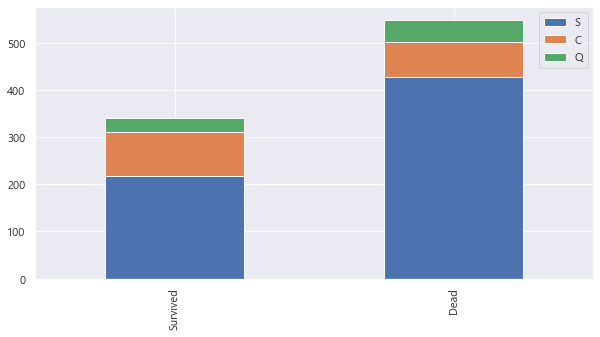

In [565]:
bar_chart('Embarked')
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.5 Fare - 티켓 가격
- 티켓가격이 안적혀있으면 어떻게 처리할까 (test data 에 missing 값 1개 있었음)
- **티켓 가격은 티켓 등급(Pclass)에 종속되는거니까 티켓 등급별 mean, median 으로**


In [566]:
# missing 값 티켓 등급(Pclass) 에 따라서 중간값 median 으로 처리 
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
print('Fare missing 값 처리 완료')

Fare missing 값 처리 완료


In [567]:
# 1,2,3 등급들 티켓의 운임료 평균
print(train[train['Pclass']==3]['Fare'].mean(), '/',train[train['Pclass']==2]['Fare'].mean(), '/', train[train['Pclass']==1]['Fare'].mean())

13.675550101832993 / 20.662183152173913 / 84.1546875


In [568]:
# 1,2,3 등급들 티켓의 운임료 중간값(median)
print(train[train['Pclass']==3]['Fare'].median(), '/', train[train['Pclass']==2]['Fare'].median(), '/', train[train['Pclass']==1]['Fare'].median())

8.05 / 14.25 / 60.287499999999994


In [569]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

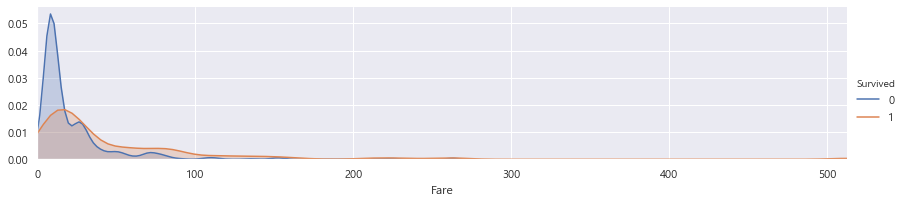

In [570]:
# Fare 티켓가격도 변수 구간화 (Binning 진행)
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

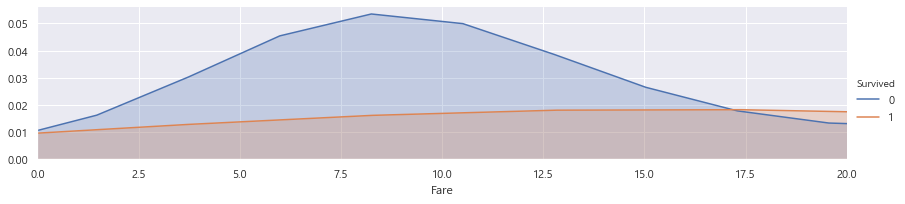

In [571]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

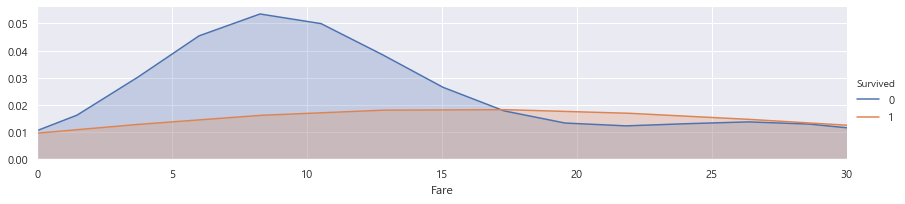

In [572]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

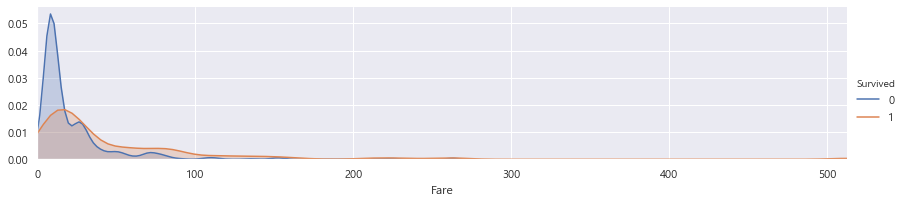

In [573]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [574]:
# 변수 구간화  
# 티켓 등급별로 묶은 걸로? / or 중위값? / 임의로 정한것에 근거 부족한느낌
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [575]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 4.6 Cabin (선실)
- https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w
- 선실도 중요한 정보중 하나이다. 배 구조상 3등급칸이 먼저 잠겼으니까
- missing 값이 매우 많음.(train - 687 / test 327)

In [576]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [577]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
E101           3
              ..
C101           1
D37            1
C30            1
E49            1
E36            1
Name: Cabin, Length: 147, dtype: int64

In [578]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [579]:
# 첫글자만 가져옴. / 한 행에 여러 개가 있는 것 처리????
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

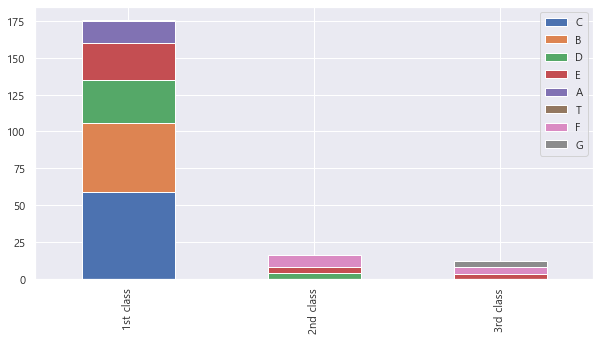

In [580]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [581]:
# 선실 매핑 - 소숫점으로 사용한 이유는 머신러닝은 계산시 숫자를 쓰고, 유클리드 거리를 쓰니까
# 숫자의 범위가 비슷해야 (수동 정규화) 같은 느낌
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [582]:
# missing 값 매핑전 Cabin
train['Cabin']

0      NaN
1      0.8
2      NaN
3      0.8
4      NaN
      ... 
886    NaN
887    0.4
888    NaN
889    0.8
890    NaN
Name: Cabin, Length: 891, dtype: float64

In [583]:
# MISSING 값들 티켓 등급별 선실의 중간값으로 매핑
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [584]:
# missing 값 매핑 후 Cabin
train['Cabin']

0      2.0
1      0.8
2      2.0
3      0.8
4      2.0
      ... 
886    1.8
887    0.4
888    2.0
889    0.8
890    2.0
Name: Cabin, Length: 891, dtype: float64

### 4.8 FamilySize

In [585]:
# 형제가 있었는지, 부모가 있었는지를 합해서 가족이 있었는지로 합함.
# 상관관계가 있는 두 변수를 활용한 (통계적 계산-sum, mean, 등등)변수도 아마 상관관계가 있을 것. 
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [586]:
'''
카테고리형은 상관관계 애매? 
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')'''

"\n카테고리형은 상관관계 애매? \nplt.figure(figsize=(15,15))\nsns.heatmap(data = train.corr(), annot=True, \nfmt = '.2f', linewidths=.5, cmap='Blues')"

(0, 11.0)

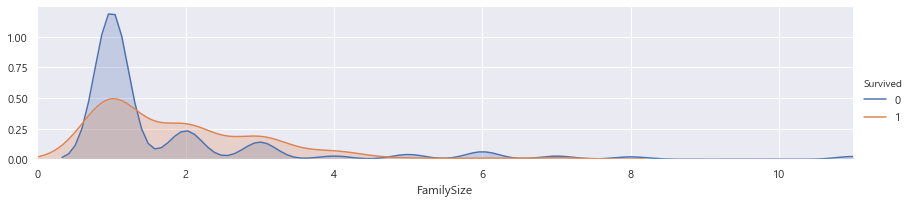

In [587]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [588]:
# 똑같이 Family mapping 매핑
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2,
                  7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [589]:
print(train.shape)
train.head()

(891, 13)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [590]:
# Ticket, SibSp, Parch 제거.
features_drop = ['Ticket', 'SibSp', 'Parch']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
train_data = train.drop('Survived', axis=1)

# train, target 구별
target = train['Survived']

print(train_data.shape, target.shape)

(891, 8) (891,)


In [594]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [596]:
# 살았는지 죽었는지
target.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

## 5. Modelling

In [592]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### 5.1 Cross Validation (K-fold)

In [597]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 5.2 kNN

In [605]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# kNN Score
round(np.mean(score)*100, 2)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


82.6

### 5.3 Decision Tree

In [606]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# decision tree Score
round(np.mean(score)*100, 2)

[0.76666667 0.80898876 0.76404494 0.7752809  0.88764045 0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]


79.46

### 5.4 Ramdom Forest

In [607]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Random Forest Score
round(np.mean(score)*100, 2)

[0.77777778 0.84269663 0.76404494 0.79775281 0.88764045 0.80898876
 0.83146067 0.79775281 0.75280899 0.80898876]


80.7

### 5.5 Naive Bayes

In [610]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Naive Bayes Score
round(np.mean(score)*100, 2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

### 5.6 SVM

In [617]:
# SVM 이 제일 높게 나왔음.
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


83.5

## 6. Testing

In [618]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [619]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [620]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## References

This notebook is created by learning from the following notebooks:
- https://www.youtube.com/watch?v=FAP7JOECfEE  // 허민석 유투브
- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)


In [623]:
# 20_05_23 
# Score 0.78947
# 4834등 22501 
print(4834/22501*100) 
# 상위 21%

21.483489622683436


![titanic_20.05.23_0.78947](images/titanic_20.05.23_0.78947.PNG)